<a href="https://colab.research.google.com/github/Majidul17068/FlowerBouquet/blob/master/Majidul_2018200000001_PricePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Important module and library  to run the program 
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import pandas as np
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/PricePredictor.csv"
df = pd.read_csv(path) #df for dataframe reading the data from the csv data file
df

,unit,price
0,1,10
1,2,20
2,3,25
3,4,40
4,5,48
5,6,69
6,7,90
7,8,100
8,9,115
9,10,120


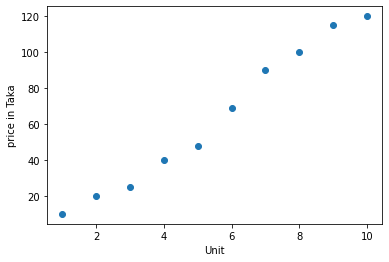

In [ ]:
# For the data visualization 
%matplotlib inline
plt.xlabel('Unit')
plt.ylabel('price in Taka')
plt.scatter(df.unit, df.price)

In [ ]:
X = df[['unit']] #since x have to be two dimentional or 2D array. So [[]]

In [ ]:
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10) 
#if  random_state=10 then the smaple will be same all the time


In [ ]:
X_train

,unit
3,4
9,10
5,6
2,3
4,5


In [ ]:
X_test

,unit
1,2
0,1
8,9
6,7
7,8


In [ ]:
y_train

3     40
9    120
5     69
2     25
4     48
Name: price, dtype: int64

In [ ]:
y_test

1     20
0     10
8    115
6     90
7    100
Name: price, dtype: int64

In [ ]:
from sklearn.neural_network import MLPClassifier

Creating Multilayer

In [ ]:
#mlp = MLPClassifier(max_iter=500, activation='relu')
#mlp
mlp = MLPClassifier(hidden_layer_sizes=(5,2),
                        max_iter = 300,activation = 'relu')

In [ ]:
mlp.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=300)

ceating ANN model just like neuron

In [ ]:

mlp = tf.keras.Sequential([
   tf.keras.layers.Dense(1, input_shape=[1], activation='linear')
   
])

In [ ]:
#model.summary() #test purpose if we want to know the model state

In [ ]:


#model.compile(optimizer='sgd',loss='mean_squared_error',metrics=['accuracy'])

mlp.compile(optimizer='sgd',
              loss='mean_squared_error',
             metrics=['accuracy'])

In [ ]:
mlp.fit(X_train, y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 573ms/step - loss: 4693.1221 - accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 319.1123 - accuracy: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 68.8409 - accuracy: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 54.2611 - accuracy: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 53.1538 - accuracy: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 0s 14ms/step - loss: 52.8182 - accuracy: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 52.5283 - accuracy: 0.0000e+00
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 52.2428 - accuracy: 0.0000e+00
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 51.9591 - accuracy: 0.0000e+00
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 51

In [ ]:
mlp.predict(X_test)

array([[ 13.986744  ],
       [  0.93340683],
       [105.36011   ],
       [ 79.25343   ],
       [ 92.30676   ]], dtype=float32)

In [ ]:
test_loss, test_acc = mlp.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 77.1929 - accuracy: 0.0000e+00 - 219ms/epoch - 219ms/step


In [ ]:
print(mlp.predict([1000])) #test if it is ok !!!!

[[13041.217]]


User Input for finding  Prediction 

In [ ]:
x=float(input('Enter the product unit : '))

import numpy as np 


my_prediction=mlp.predict([[x]])

price=np.asscalar(np.array(my_prediction)) #convert vector into scalar using this one line only

#convert vector into scalar using below two lines
#price=np.array(my_prediction) 
#price=price.item()

print('Predicted',x,' Unit  price is =',price ,' Taka')

Enter the product unit : 15
Predicted 15.0  Unit  price is = 183.68011474609375  Taka


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  
